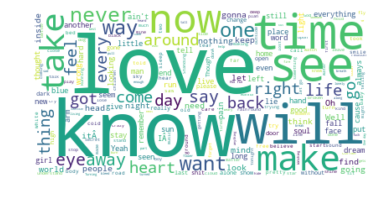

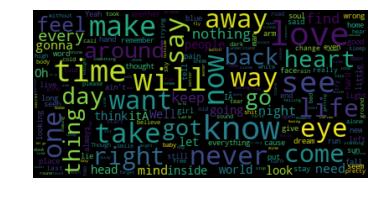

In [2]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

# Read the whole text.
f = pd.read_csv('song_verse.csv', sep=',', encoding = "ISO-8859-1")
f = f.text
text = ""
for sent in range(len(f)):
    text = text + f[sent];
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wordcloud = WordCloud(background_color="white", max_words=2000,stopwords=stopwords)

# generate word cloud
wordcloud.generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
import numpy as np
import pandas as pd

import csv
indexes = []
import operator
lyrics = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[["Genre","Tempo","Valence"]].as_matrix()
X_lyrics   

array([[  4.00000000e+00,   8.64780000e+01,   4.24000000e-01],
       [  5.00000000e+00,   1.18029000e+02,   8.62000000e-01],
       [  3.00000000e+00,   1.42380000e+02,   7.17000000e-01],
       [  3.00000000e+00,   1.18191000e+02,   5.47000000e-01],
       [  3.00000000e+00,   1.23517000e+02,   7.10000000e-01],
       [  3.00000000e+00,   1.19829000e+02,   5.48000000e-01],
       [  3.00000000e+00,   1.59335000e+02,   4.90000000e-01],
       [  3.00000000e+00,   1.25466000e+02,   8.74000000e-01],
       [  3.00000000e+00,   1.00904000e+02,   7.21000000e-01],
       [  6.00000000e+00,   1.27089000e+02,   1.91000000e-01],
       [  7.00000000e+00,   7.62470000e+01,   3.60000000e-01],
       [  8.00000000e+00,   1.47349000e+02,   3.26000000e-01],
       [  8.00000000e+00,   1.52007000e+02,   3.04000000e-01],
       [  8.00000000e+00,   1.79821000e+02,   1.04000000e-01],
       [  8.00000000e+00,   1.00026000e+02,   3.43000000e-01],
       [  8.00000000e+00,   1.19531000e+02,   6.1100000

Automatically created module for IPython interactive environment
Estimated number of clusters: 1
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.072


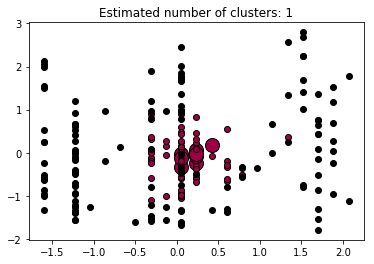

In [48]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[0, 0], [-1, -1], [1, -1]]
X = X_lyrics
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=40).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()